In [1]:
import re
import pandas as pd

In [2]:
f=open('WhatsApp Chat with Cs-1  Unofficial.txt','r',encoding='utf-8')

In [3]:
data=f.read()

In [7]:
print(data)

07/09/22, 10:02 am - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
07/09/22, 10:00 am - Arun Akg created group "CS-1 unofficial  "
07/09/22, 10:02 am - Archas Akg added you
07/09/22, 10:02 am - Deepak Khandelwal Akg added +91 70681 17946
07/09/22, 10:02 am - Deepak Khandelwal Akg added +91 81268 10072
07/09/22, 10:02 am - Alan Akg added +91 70786 55644
07/09/22, 10:02 am - Himanshi Cs Akg: Ek link Bana ke send krdo...sb khud add ho jaenge
07/09/22, 10:03 am - Himanshi Cs Akg: Or vo circulate krdo
07/09/22, 10:03 am - +91 73557 10090 joined using this group's invite link
07/09/22, 10:03 am - +91 6388 087 440 joined using this group's invite link
07/09/22, 10:03 am - Archas Akg added Khushi Khurana Akg, +91 75058 47365, +91 88825 76298 and +91 93692 03013
07/09/22, 10:03 am - You're now an admin
07/09/22, 10:03 am - +91 87003 76567 joined using this group's invite link
07/09/22, 10:03 am - +91 8

In [11]:
pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s\w{2}\s-\s'

In [13]:
messages=re.split(pattern,data)[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Arun Akg created group "CS-1 unofficial  "\n',
 'Archas Akg added you\n',
 'Deepak Khandelwal Akg added +91 70681 17946\n',
 'Deepak Khandelwal Akg added +91 81268 10072\n',
 'Alan Akg added +91 70786 55644\n',
 'Himanshi Cs Akg: Ek link Bana ke send krdo...sb khud add ho jaenge\n',
 'Himanshi Cs Akg: Or vo circulate krdo\n',
 "+91 73557 10090 joined using this group's invite link\n",
 "+91 6388 087 440 joined using this group's invite link\n",
 'Archas Akg added Khushi Khurana Akg, +91 75058 47365, +91 88825 76298 and +91 93692 03013\n',
 "You're now an admin\n",
 "+91 87003 76567 joined using this group's invite link\n",
 "+91 82736 28839 joined using this group's invite link\n",
 'You added Bhavishya Akg\n',
 'Alan Akg added +91 90268 38893\n',
 "+91 87911 49657 joined using this group's invite link\n",
 'Alan Akg added +91 98716 13713\n

In [44]:
dates=re.findall(pattern,data)
for i in range(len(dates)):
    dates[i]=dates[i].replace(' - ','').replace(',','')
dates

['07/09/22 10:02 am',
 '07/09/22 10:00 am',
 '07/09/22 10:02 am',
 '07/09/22 10:02 am',
 '07/09/22 10:02 am',
 '07/09/22 10:02 am',
 '07/09/22 10:02 am',
 '07/09/22 10:03 am',
 '07/09/22 10:03 am',
 '07/09/22 10:03 am',
 '07/09/22 10:03 am',
 '07/09/22 10:03 am',
 '07/09/22 10:03 am',
 '07/09/22 10:03 am',
 '07/09/22 10:03 am',
 '07/09/22 10:04 am',
 '07/09/22 10:04 am',
 '07/09/22 10:04 am',
 '07/09/22 10:04 am',
 '07/09/22 10:04 am',
 '07/09/22 10:04 am',
 '07/09/22 10:04 am',
 '07/09/22 10:04 am',
 '07/09/22 10:06 am',
 '07/09/22 10:06 am',
 '07/09/22 10:06 am',
 '07/09/22 10:06 am',
 '07/09/22 10:07 am',
 '07/09/22 10:07 am',
 '07/09/22 10:07 am',
 '07/09/22 10:07 am',
 '07/09/22 10:07 am',
 '07/09/22 10:08 am',
 '07/09/22 10:08 am',
 '07/09/22 10:08 am',
 '07/09/22 10:08 am',
 '07/09/22 10:08 am',
 '07/09/22 10:09 am',
 '07/09/22 10:09 am',
 '07/09/22 10:09 am',
 '07/09/22 10:09 am',
 '07/09/22 10:10 am',
 '07/09/22 10:10 am',
 '07/09/22 10:10 am',
 '07/09/22 10:10 am',
 '07/09/22

In [56]:
df=pd.DataFrame({'user_message':messages,'date':dates})
df['date']=pd.to_datetime(df['date'])
df.head()

user_message                date
0  Messages and calls are end-to-end encrypted. N... 2022-07-09 10:02:00
1       Arun Akg created group "CS-1 unofficial  "\n 2022-07-09 10:00:00
2                             Archas Akg added you\n 2022-07-09 10:02:00
3      Deepak Khandelwal Akg added +91 70681 17946\n 2022-07-09 10:02:00
4      Deepak Khandelwal Akg added +91 81268 10072\n 2022-07-09 10:02:00

In [58]:
users=[]
message=[]
for m in df['user_message']:
    entry=re.split('([\w\W]+?):\s',m)
    if entry[1:]:
        users.append(entry[1])
        message.append(entry[2])
    else:
        users.append('group_notification')
        message.append(entry[0])
df['user']=users
df['message']=message
df.drop(columns='user_message',inplace=True)
df

date                   user  \
0    2022-07-09 10:02:00     group_notification   
1    2022-07-09 10:00:00     group_notification   
2    2022-07-09 10:02:00     group_notification   
3    2022-07-09 10:02:00     group_notification   
4    2022-07-09 10:02:00     group_notification   
5    2022-07-09 10:02:00     group_notification   
6    2022-07-09 10:02:00        Himanshi Cs Akg   
7    2022-07-09 10:03:00        Himanshi Cs Akg   
8    2022-07-09 10:03:00     group_notification   
9    2022-07-09 10:03:00     group_notification   
10   2022-07-09 10:03:00     group_notification   
11   2022-07-09 10:03:00     group_notification   
12   2022-07-09 10:03:00     group_notification   
13   2022-07-09 10:03:00     group_notification   
14   2022-07-09 10:03:00     group_notification   
15   2022-07-09 10:04:00     group_notification   
16   2022-07-09 10:04:00     group_notification   
17   2022-07-09 10:04:00     group_notification   
18   2022-07-09 10:04:00     group_notification   
19   2022-07-09 10:04:00     group_notification   
20   2022-07-09 10:04:00     group_notification   
21   2022-07-09 10:04:00     group_notification   
22   2022-07-09 10:04:00     group_notification   
23   2022-07-09 10:06:00     group_notification   
24   2022-07-09 10:06:00     group_notification   
25   2022-07-09 10:06:00     group_notification   
26   2022-07-09 10:06:00     group_notification   
27   2022-07-09 10:07:00     group_notification   
28   2022-07-09 10:07:00     group_notification   
29   2022-07-09 10:07:00     group_notification   
30   2022-07-09 10:07:00     group_notification   
31   2022-07-09 10:07:00     group_notification   
32   2022-07-09 10:08:00     group_notification   
33   2022-07-09 10:08:00     group_notification   
34   2022-07-09 10:08:00     group_notification   
35   2022-07-09 10:08:00     group_notification   
36   2022-07-09 10:08:00     group_notification   
37   2022-07-09 10:09:00     group_notification   
38   2022-07-09 10:09:00     group_notification   
39   2022-07-09 10:09:00     group_notification   
40   2022-07-09 10:09:00     group_notification   
41   2022-07-09 10:10:00     group_notification   
42   2022-07-09 10:10:00     group_notification   
43   2022-07-09 10:10:00     group_notification   
44   2022-07-09 10:10:00     group_notification   
45   2022-07-09 10:10:00     group_notification   
46   2022-07-09 10:11:00     group_notification   
47   2022-07-09 10:11:00     group_notification   
48   2022-07-09 10:12:00     group_notification   
49   2022-07-09 10:12:00     group_notification   
50   2022-07-09 10:13:00     group_notification   
51   2022-07-09 10:29:00        +91 87003 76567   
52   2022-07-09 10:29:00        +91 87003 76567   
53   2022-07-09 10:29:00        +91 87003 76567   
54   2022-07-09 10:36:00     group_notification   
55   2022-07-09 11:21:00     group_notification   
56   2022-07-09 11:31:00              Harsh Akg   
57   2022-07-09 11:57:00       +91 6396 947 106   
58   2022-07-09 11:59:00              Harsh Akg   
59   2022-07-09 12:00:00               Arun Akg   
60   2022-07-09 12:01:00       +91 6396 947 106   
61   2022-07-09 12:38:00              Harsh Akg   
62   2022-07-09 12:51:00     group_notification   
63   2022-07-09 14:22:00        +91 96213 03910   
64   2022-07-09 14:22:00        +91 96213 03910   
65   2022-07-09 14:24:00        +91 96213 03910   
66   2022-07-09 14:24:00        +91 96213 03910   
67   2022-07-09 18:44:00     group_notification   
68   2022-07-09 21:49:00     group_notification   
69   2022-08-09 08:01:00     group_notification   
70   2022-08-09 09:53:00     group_notification   
71   2022-08-09 12:48:00              Harsh Akg   
72   2022-08-09 12:49:00       +91 6388 087 440   
73   2022-08-09 12:50:00     group_notification   
74   2022-08-09 12:58:00     group_notification   
75   2022-08-09 13:04:00     group_notification   
76   2022-09-09 11:14:00     group_notification   
77   2022-09-09 12:07:00     group_notific

In [61]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month_name()
df['day']=df['date'].dt.day
df['hour']=df['date'].dt.hour
df['minute']=df['date'].dt.minute 

In [62]:
df

date                   user  \
0    2022-07-09 10:02:00     group_notification   
1    2022-07-09 10:00:00     group_notification   
2    2022-07-09 10:02:00     group_notification   
3    2022-07-09 10:02:00     group_notification   
4    2022-07-09 10:02:00     group_notification   
5    2022-07-09 10:02:00     group_notification   
6    2022-07-09 10:02:00        Himanshi Cs Akg   
7    2022-07-09 10:03:00        Himanshi Cs Akg   
8    2022-07-09 10:03:00     group_notification   
9    2022-07-09 10:03:00     group_notification   
10   2022-07-09 10:03:00     group_notification   
11   2022-07-09 10:03:00     group_notification   
12   2022-07-09 10:03:00     group_notification   
13   2022-07-09 10:03:00     group_notification   
14   2022-07-09 10:03:00     group_notification   
15   2022-07-09 10:04:00     group_notification   
16   2022-07-09 10:04:00     group_notification   
17   2022-07-09 10:04:00     group_notification   
18   2022-07-09 10:04:00     group_notification   
19   2022-07-09 10:04:00     group_notification   
20   2022-07-09 10:04:00     group_notification   
21   2022-07-09 10:04:00     group_notification   
22   2022-07-09 10:04:00     group_notification   
23   2022-07-09 10:06:00     group_notification   
24   2022-07-09 10:06:00     group_notification   
25   2022-07-09 10:06:00     group_notification   
26   2022-07-09 10:06:00     group_notification   
27   2022-07-09 10:07:00     group_notification   
28   2022-07-09 10:07:00     group_notification   
29   2022-07-09 10:07:00     group_notification   
30   2022-07-09 10:07:00     group_notification   
31   2022-07-09 10:07:00     group_notification   
32   2022-07-09 10:08:00     group_notification   
33   2022-07-09 10:08:00     group_notification   
34   2022-07-09 10:08:00     group_notification   
35   2022-07-09 10:08:00     group_notification   
36   2022-07-09 10:08:00     group_notification   
37   2022-07-09 10:09:00     group_notification   
38   2022-07-09 10:09:00     group_notification   
39   2022-07-09 10:09:00     group_notification   
40   2022-07-09 10:09:00     group_notification   
41   2022-07-09 10:10:00     group_notification   
42   2022-07-09 10:10:00     group_notification   
43   2022-07-09 10:10:00     group_notification   
44   2022-07-09 10:10:00     group_notification   
45   2022-07-09 10:10:00     group_notification   
46   2022-07-09 10:11:00     group_notification   
47   2022-07-09 10:11:00     group_notification   
48   2022-07-09 10:12:00     group_notification   
49   2022-07-09 10:12:00     group_notification   
50   2022-07-09 10:13:00     group_notification   
51   2022-07-09 10:29:00        +91 87003 76567   
52   2022-07-09 10:29:00        +91 87003 76567   
53   2022-07-09 10:29:00        +91 87003 76567   
54   2022-07-09 10:36:00     group_notification   
55   2022-07-09 11:21:00     group_notification   
56   2022-07-09 11:31:00              Harsh Akg   
57   2022-07-09 11:57:00       +91 6396 947 106   
58   2022-07-09 11:59:00              Harsh Akg   
59   2022-07-09 12:00:00               Arun Akg   
60   2022-07-09 12:01:00       +91 6396 947 106   
61   2022-07-09 12:38:00              Harsh Akg   
62   2022-07-09 12:51:00     group_notification   
63   2022-07-09 14:22:00        +91 96213 03910   
64   2022-07-09 14:22:00        +91 96213 03910   
65   2022-07-09 14:24:00        +91 96213 03910   
66   2022-07-09 14:24:00        +91 96213 03910   
67   2022-07-09 18:44:00     group_notification   
68   2022-07-09 21:49:00     group_notification   
69   2022-08-09 08:01:00     group_notification   
70   2022-08-09 09:53:00     group_notification   
71   2022-08-09 12:48:00              Harsh Akg   
72   2022-08-09 12:49:00       +91 6388 087 440   
73   2022-08-09 12:50:00     group_notification   
74   2022-08-09 12:58:00     group_notification   
75   2022-08-09 13:04:00     group_notification   
76   2022-09-09 11:14:00     group_notification   
77   2022-09-09 12:07:00     group_notific

In [66]:
df[df['user']=='Aruj Bansal'].shape[0]

231

In [68]:
selected_user='Aruj\nBansal'
df_user=df[df['user']==selected_user.replace('\n',' ')]
df_user
words=[]
for i in df_user['message']:
    words.extend(i.split())
len(words)

1007

<IPython.core.display.Javascript object>

TypeError: cannot unpack non-iterable AxesSubplot object

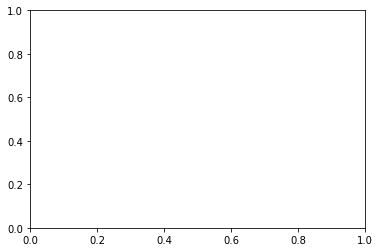

In [71]:
x=df['user'].value_counts().head()
fig,ax=plt.subplot()
ax.bar(x.index,x.values,color='red')
plt.xticks(rotation='vertical')
st.pyplot(fig)

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

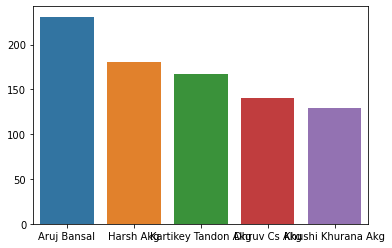

In [102]:
x=df['user'].value_counts().head()
    sns.barplot(x.index,x.values)

<IPython.core.display.Javascript object>

<BarContainer object of 5 artists>

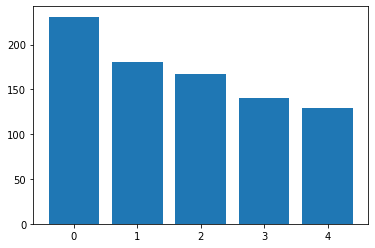

In [89]:
# ypos=np.arrange(x[0])
plt.bar([0,1,2,3,4],x['user'])

In [105]:
round(df['user'].value_counts()/df.shape[0]*100,2).reset_index().rename(columns={'index':'Name','user':'Percentage'})

index  user
0             Aruj Bansal  9.29
1               Harsh Akg  7.24
2     Kartikey Tandon Akg  6.71
3            Dhruv Cs Akg  5.63
4      Khushi Khurana Akg  5.19
5         Gracy Gupta Akg  4.66
6               Mudit Akg  4.06
7      group_notification  3.86
8         +91 70073 61341  3.78
9         +91 86046 95404  2.98
10       +91 6396 947 106  2.73
11       +91 6388 087 440  2.69
12        +91 81268 10072  2.57
13       +91 6306 261 098  2.53
14            Annanay Akg  2.49
15        +91 73986 82731  2.49
16               Arun Akg  2.49
17        +91 87003 76567  1.77
18        +91 89237 52959  1.69
19        +91 91296 09857  1.61
20        +91 96756 78900  1.57
21        +91 96213 03910  1.53
22        +91 91492 70627  1.37
23        +91 73023 78886  1.21
24        +91 98187 36335  1.21
25               Alan Akg  1.01
26  Deepak Khandelwal Akg  0.92
27        +91 90269 66093  0.92
28        +91 80579 85480  0.88
29             Archas Akg  0.88
30        +91 70681 17946  0.84
31        +91 70786 55644  0.80
32        +91 92649 70060  0.72
33        +91 94123 23539  0.68
34        Himanshi Cs Akg  0.68
35        +91 75050 79775  0.56
36          Bhavishya Akg  0.56
37        +91 90268 38893  0.52
38        +91 79053 99750  0.52
39        +91 93692 05423  0.48
40       +91 6386 853 276  0.48
41            Anushka Akg  0.48
42        +91 82736 28839  0.44
43        +91 79051 26341  0.44
44        +91 70075 16477  0.36
45        +91 88088 43695  0.36
46        +91 97607 16491  0.28
47        +91 95803 74662  0.24
48       +91 6394 628 085  0.24
49        +91 93692 35939  0.16
50        +91 98974 18769  0.16
51        +91 84475 91059  0.12
52        +91 95207 34231  0.12
53       +91 6397 223 051  0.12
54        +91 87915 98793  0.12
55        +91 89482 63902  0.12
56       +91 6395 206 178  0.12
57        +91 95206 54005  0.12
58        +91 87911 49657  0.12
59        +91 83035 74827  0.08
60        +91 70685 85855  0.08
61        Anup Pandey Akg  0.08
62        +91 73557 10090  0.08
63        +91 81879 96042  0.08
64        +91 75058 47365  0.08
65        +91 93692 03013  0.08
66        +91 98357 98629  0.08
67        +91 82186 55858  0.04
68        +91 80770 30016  0.04
69        +91 89602 46793  0.04
70        +91 89238 72514  0.04
71        +91 99105 88264  0.04
72              Akash Akg  0.04
73        +91 93694 31705  0.04
74        +91 88825 76298  0.04
75        +91 82996 47478  0.04

In [106]:
from wordcloud import WordCloud

In [109]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
df_wc=wc.generate(df['message'].str.cat(sep=' '))
df_wc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AttributeError: module 'matplotlib.pyplot' has no attribute 'pyplot'

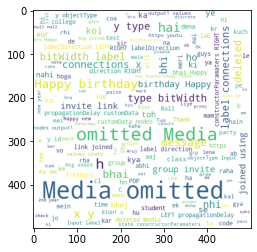

In [112]:
fig,ax=plt.subplots()
ax.imshow(df_wc)
plt.pyplot(fig)

In [139]:
df_new=df[df['message']!='<Media omitted>\n']['message']
dfc=[]
for i in df_new:
    if(i.find('joined using this group')==-1):
        dfc.append(i)
dfc = pd.Series(dfc)

In [141]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
df_wc=wc.generate(dfc.str.cat(sep=' '))
df_wc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AttributeError: module 'matplotlib.pyplot' has no attribute 'pyplot'

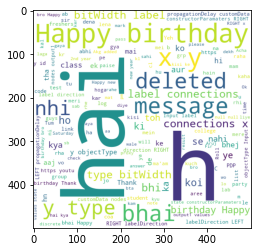

In [142]:
fig,ax=plt.subplots()
ax.imshow(df_wc)
plt.pyplot(fig)

In [144]:
from collections import Counter

In [145]:
f=open('stop_hinglish.txt','r')
stop_word=f.read()
temp=df[df['user']!='group_notification']
temp=temp[temp['message']!='<Media omitted>\n']

words=[]

for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_word:
            words.append(word)
dfv=pd.DataFrame(Counter(words).most_common(20))    
dfv

0    1
0      happy  174
1   birthday  140
2    deleted   98
3    message   97
4          😂   43
5       bhej   36
6         +1   33
7      class   31
8       dena   28
9       null   26
10        hn   26
11      year   23
12      link   21
13       coa   19
14      test   19
15       lab   17
16  students   17
17       pdp   17
18     ma'am   17
19  freshers   17

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

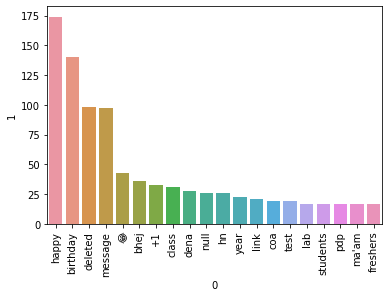

In [150]:
plt.xticks(rotation='vertical')
sns.barplot(dfv[0],dfv[1])

In [151]:
import emoji

In [154]:
emojis=[]
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [156]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

0    1
0    😂  146
1    🥳   88
2    🎉   85
3    🎂   81
4    🙏   29
5    ❤   29
6    ✨   23
7    🥹   19
8    🎊   18
9    🏻   15
10   🤣   15
11   👍   14
12   🥲   13
13   😅   13
14   🎁   10
15   🥂    8
16   🤔    8
17   🫂    7
18   🙂    7
19   😁    6
20   😌    6
21   🌚    6
22   😭    5
23   🫠    5
24   🤨    5
25   🌝    5
26   😒    4
27   🤐    4
28   🙃    4
29   🍻    4
30   🍰    4
31   💫    4
32   😎    4
33   ✔    4
34   🍺    3
35   🍾    3
36   ❣    3
37   🤡    3
38   🎆    3
39   🧐    3
40   🙄    3
41   🍫    3
42   🙆    2
43   ♂    2
44   ♀    2
45   🤝    2
46   👎    2
47   🤜    2
48   🤛    2
49   😊    2
50   🫥    2
51   😄    2
52   🤌    2
53   🍷    2
54   ☕    2
55   🐱    2
56   🫡    2
57   🎈    2
58   😐    2
59   🫣    2
60   😕    2
61   🤦    1
62   👽    1
63   🕺    1
64   🥰    1
65   😉    1
66   😍    1
67   😴    1
68   🥽    1
69   🤧    1
70   🥺    1
71   👏    1
72   😈    1
73   💥    1
74   💗    1
75   😶    1
76   🌫    1
77   👉    1
78   👈    1
79   😤    1
80   🤷    1
81   🔥    1
82   🐒    1
83   ✌    1
84   💐    1
85   💋    1
86   😳    1
87   🫤    1
88   😵    1
89   🍥    1
90   🥧    1
91   🤞    1
92   😡    1
93   😃    1
94   😏    1
95   🥷    1
96   🔴    1
97   🟠    1
98   🟡    1
99   ☺    1
100  🎇    1
101  😪    1
102  ☹    1

In [157]:
df['month_num']=df['date'].dt.month
df

date                   user  \
0    2022-07-09 10:02:00     group_notification   
1    2022-07-09 10:00:00     group_notification   
2    2022-07-09 10:02:00     group_notification   
3    2022-07-09 10:02:00     group_notification   
4    2022-07-09 10:02:00     group_notification   
5    2022-07-09 10:02:00     group_notification   
6    2022-07-09 10:02:00        Himanshi Cs Akg   
7    2022-07-09 10:03:00        Himanshi Cs Akg   
8    2022-07-09 10:03:00     group_notification   
9    2022-07-09 10:03:00     group_notification   
10   2022-07-09 10:03:00     group_notification   
11   2022-07-09 10:03:00     group_notification   
12   2022-07-09 10:03:00     group_notification   
13   2022-07-09 10:03:00     group_notification   
14   2022-07-09 10:03:00     group_notification   
15   2022-07-09 10:04:00     group_notification   
16   2022-07-09 10:04:00     group_notification   
17   2022-07-09 10:04:00     group_notification   
18   2022-07-09 10:04:00     group_notification   
19   2022-07-09 10:04:00     group_notification   
20   2022-07-09 10:04:00     group_notification   
21   2022-07-09 10:04:00     group_notification   
22   2022-07-09 10:04:00     group_notification   
23   2022-07-09 10:06:00     group_notification   
24   2022-07-09 10:06:00     group_notification   
25   2022-07-09 10:06:00     group_notification   
26   2022-07-09 10:06:00     group_notification   
27   2022-07-09 10:07:00     group_notification   
28   2022-07-09 10:07:00     group_notification   
29   2022-07-09 10:07:00     group_notification   
30   2022-07-09 10:07:00     group_notification   
31   2022-07-09 10:07:00     group_notification   
32   2022-07-09 10:08:00     group_notification   
33   2022-07-09 10:08:00     group_notification   
34   2022-07-09 10:08:00     group_notification   
35   2022-07-09 10:08:00     group_notification   
36   2022-07-09 10:08:00     group_notification   
37   2022-07-09 10:09:00     group_notification   
38   2022-07-09 10:09:00     group_notification   
39   2022-07-09 10:09:00     group_notification   
40   2022-07-09 10:09:00     group_notification   
41   2022-07-09 10:10:00     group_notification   
42   2022-07-09 10:10:00     group_notification   
43   2022-07-09 10:10:00     group_notification   
44   2022-07-09 10:10:00     group_notification   
45   2022-07-09 10:10:00     group_notification   
46   2022-07-09 10:11:00     group_notification   
47   2022-07-09 10:11:00     group_notification   
48   2022-07-09 10:12:00     group_notification   
49   2022-07-09 10:12:00     group_notification   
50   2022-07-09 10:13:00     group_notification   
51   2022-07-09 10:29:00        +91 87003 76567   
52   2022-07-09 10:29:00        +91 87003 76567   
53   2022-07-09 10:29:00        +91 87003 76567   
54   2022-07-09 10:36:00     group_notification   
55   2022-07-09 11:21:00     group_notification   
56   2022-07-09 11:31:00              Harsh Akg   
57   2022-07-09 11:57:00       +91 6396 947 106   
58   2022-07-09 11:59:00              Harsh Akg   
59   2022-07-09 12:00:00               Arun Akg   
60   2022-07-09 12:01:00       +91 6396 947 106   
61   2022-07-09 12:38:00              Harsh Akg   
62   2022-07-09 12:51:00     group_notification   
63   2022-07-09 14:22:00        +91 96213 03910   
64   2022-07-09 14:22:00        +91 96213 03910   
65   2022-07-09 14:24:00        +91 96213 03910   
66   2022-07-09 14:24:00        +91 96213 03910   
67   2022-07-09 18:44:00     group_notification   
68   2022-07-09 21:49:00     group_notification   
69   2022-08-09 08:01:00     group_notification   
70   2022-08-09 09:53:00     group_notification   
71   2022-08-09 12:48:00              Harsh Akg   
72   2022-08-09 12:49:00       +91 6388 087 440   
73   2022-08-09 12:50:00     group_notification   
74   2022-08-09 12:58:00     group_notification   
75   2022-08-09 13:04:00     group_notification   
76   2022-09-09 11:14:00     group_notification   
77   2022-09-09 12:07:00     group_notific

In [161]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()
timeline

year  month_num      month  message
0   2022          1    January       26
1   2022          2   February        9
2   2022          3      March       41
3   2022          4      April       36
4   2022          5        May      298
5   2022          6       June       57
6   2022          7       July      155
7   2022          8     August      100
8   2022          9  September      431
9   2022         10    October      297
10  2022         11   November      607
11  2022         12   December      359
12  2023          1    January       25
13  2023          2   February        2
14  2023          3      March        5
15  2023          4      April       11
16  2023          5        May       19
17  2023          6       June        9